# Testing Kramers-Kronig Integration

* Test taken from the paper that defines the Kramers-Kronig Integration.
* Parameterization of the optical functions of amorphous materials in the interband region.

In [1]:
import math
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt

## Notes

* Tauc published an expression for the imaginary part of the dielectric function above the band edge:

$$\varepsilon_{2}(E)=\frac{A_{T}(E-E_{g})^{2}}{E^{2}}$$

* where the two constants to be fit are $A_{T}$ and the optical band gap $E_{g}$.
* Forouhi and Bloomer published a formulation for the optical constants of amorphous semiconductors using the same formalism, and obtained:

$$k_{FB}(E)=\frac{A(E-E_{g})^{2}}{(E^{2}-B)(E+C)}$$

* where A, B, C, and $E_{g}$ are treated as fitting parameters.
* The refractive index n(E) is obtained from k(E) using the KK integration, where a term $n(\infty)$ was included as an additional fitting parameter.
* There are some fundamental limits, and this paper reports a new parameterization of the optical functions of amorphous materials that corrects the errors listed.
* If only a single transition is considered:

$$\varepsilon_{2}(E)=2nk=\frac{A_{L}E_{0}CE}{(E^{2}-E_{0}^{2})^{2}+C^{2}E^{2}}$$

* where $E_{0}$ is the peak transition energy and C is the broadening term.
* Therefore, multiplying the above, one obtains:

$$\varepsilon_{2TL}(E)=\begin{cases}\frac{AE_{0}C(E-E_{g})^{2}}{(E^{2}-E_{0}^{2})^{2}+C^{2}E^{2}}\frac{1}{E}&\text{if }E>E_{g}\\0&\text{if }E\leq E_{g}\end{cases}$$

* The subscript TL indicates that the model is based on the Tauc joint density of states and the Lorentz oscillator; the four fitting parameters are $E_{g}$, A, $E_{0}$, and C, and are all in the units of energy.
As with F&B, the real part of the dielectric function is obtain by the KK integration, given by:



## Initial Parameters

* Data taken from table 1, for a-Si II.

In [2]:
eV_range = np.arange(0.8, 5.91, 0.01)
Eg = 1.2
eps_inf = 1.15
A = 122
E0 = 3.45
C = 2.54

* Now use the equation below table 1

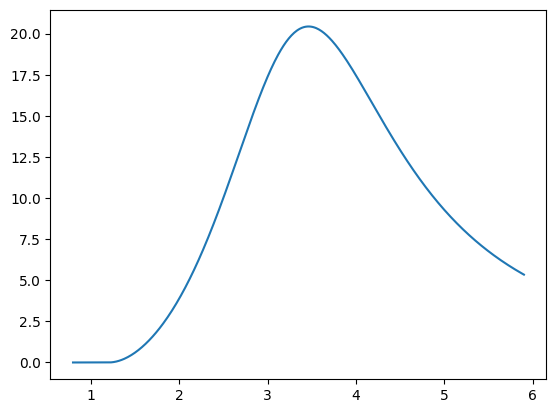

In [3]:
def eps2_TL(E, A, E0, C, Eg):
    eps = (
        (
            ((A*E0*C*((E-Eg)**2))) /
            ((((E**2)-(E0**2))**2)+((C**2)*(E**2)))) *
        (1 / E))
    return eps

eps_2 = []
for e in eV_range:
    if e <= Eg:
        eps_2.append(0)
    else:
        eps = eps2_TL(e, A, E0, C, Eg)
        eps_2.append(eps)

fig, ax = plt.subplots(1)
ax.plot(eV_range, eps_2)
plt.show()

* While there is no plot for $\varepsilon_{2}$ in the paper, this does look like an absorption peak around 3.7eV.
* Now let's do the eps_1 equation.

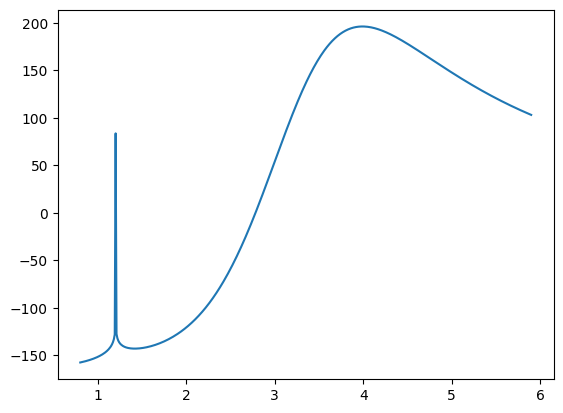

In [4]:
def eps1_TL(E, E_inf, A, C, E0, Eg, alpha, gamma):
    xi = (((E**2)-(gamma**2))**2)+(((alpha**2)*(C**2))/4)
    a_in = ((Eg**2)-(E0**2))*(E**2)+((Eg**2)*(C**2))+(Eg**2)*((E0**2)+3*(Eg**2))
    a_atan = ((E**2)-(E0**2))*((E0**2)+(Eg**2))+(Eg**2)*(C**2)
    eps = (
        E_inf +
        (
            (1/2)*(A/np.pi)*(C/xi)*(a_in/(alpha*E0)) *
            (
                math.log(
                    ((E0**2)+(Eg**2)+(alpha*Eg))/((E0**2)+(Eg**2)-(alpha*Eg))
                )
            )
        ) -
        (
            (A/(np.pi*xi))*(a_atan/E0)*(
                np.pi - np.arctan((2*Eg+alpha)/C) + np.arctan((-2*Eg+alpha)/C)
            )
        ) +
        (
            2*((A*E0*C)/(np.pi*xi))*((
                Eg*((E**2)-(gamma**2))*(
                    np.pi+2*np.arctan(((gamma**2)-(Eg**2))/(alpha*C))
                    )
                )
            )
        ) -
        (
            2*((A*E0*C)/(np.pi*xi))*(((E**2)+(Eg**2))/E)*math.log(
                (abs(E-Eg))/(E+Eg)
            )
        ) +
        (
            2*((A*E0*C)/(np.pi*xi))*Eg*math.log(
                ((abs(E-Eg))*(E+Eg))/
                (np.sqrt((((E0**2)-(Eg**2))**2)+((Eg**2)*(C**2))))
            )
        )
    )
    return eps

gamma = np.sqrt((E0**2)-(C**2/2))
alpha = np.sqrt(4*(E0**2)-(C**2))
eps_1 = [eps1_TL(e, eps_inf, A, C, E0, Eg, alpha, gamma) for e in eV_range]

fig, ax = plt.subplots(1)
ax.plot(eV_range, eps_1)
plt.show()

* So now let's try and find n and k in the usual way.

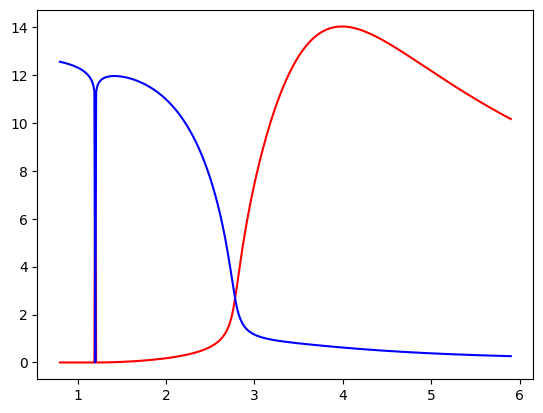

In [5]:
def ns(eps_r, eps_i):
    ref_index = np.sqrt((np.sqrt((eps_r**2)+(eps_i**2))+eps_r)/2)
    return ref_index
def ks(eps_r, eps_i):
    ext_coeff = np.sqrt((np.sqrt((eps_r**2)+(eps_i**2))-eps_r)/2)
    return ext_coeff

n = [ns(e_r, e_i) for e_r, e_i in zip(eps_1, eps_2)]
k = [ks(e_r, e_i) for e_r, e_i in zip(eps_1, eps_2)]

fig, ax = plt.subplots(1)
ax.plot(eV_range, n, 'r')
ax.plot(eV_range, k, 'b')
plt.show()

* This still doesn't work as it does in the paper, something must be wrong.
* Needs to be investigated.